In [255]:
from numpy.random import randint 
import numpy.random as rnd
import numpy as np
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

In [256]:
# parameters

modelPath = ""
modelName = "NNMedian.keras"

n_arrays = 2_000
array_length = 50
max_digit = 100
epochs = 40
batch_size = 32
neurons = 8

In [257]:
# calculate number of permutation 
print("number of permutation: ", max_digit**array_length)
print("percentage of view:", (n_arrays * 0.5) * 100 / max_digit**array_length, "%")

number of permutation:  10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
percentage of view: 1e-95 %


In [258]:
# generate input and output data
# give different max value 

input_arrays = []
label_arrays = []
for _ in range(n_arrays):
    temp_array = randint(0, randint(max_digit // 4, max_digit), array_length)
    temp_label = np.sort(temp_array)
    
    input_arrays.append(temp_array)
    label_arrays.append(temp_label)

In [259]:
print(len(input_arrays), len(label_arrays))
print(input_arrays[:3])
print(label_arrays[:3])

2000 2000
[array([ 2, 25, 20, 32,  7, 25, 11,  6, 19,  1, 15,  2,  5, 35, 23, 36, 22,
       35, 29,  0, 22, 14, 24, 34, 31, 32, 34, 31, 12, 17, 15, 33,  6,  9,
       37, 24,  4, 31, 29, 33, 14, 32,  0, 20,  3, 21, 10, 15, 27,  3]), array([17, 14, 46,  2, 43, 23, 36, 63, 48,  2, 54, 62, 63, 19, 67,  7, 35,
       45, 28, 61, 40, 31, 56, 24, 66,  2, 42, 17, 50, 56, 54, 43, 12, 66,
       52, 11, 58, 17, 33, 66, 16, 40, 43, 48, 61, 40, 12, 16, 53,  1]), array([33, 77, 49, 46, 25, 88, 57, 47, 87, 87,  1, 81, 44, 35, 55, 76, 29,
       20, 36, 10, 72, 31,  0, 80, 21, 77, 25, 34, 66, 65, 30, 25, 70, 56,
       57, 24, 61, 70, 75, 72, 60, 35, 57, 27, 16, 80, 41, 58, 19, 86])]
[array([ 0,  0,  1,  2,  2,  3,  3,  4,  5,  6,  6,  7,  9, 10, 11, 12, 14,
       14, 15, 15, 15, 17, 19, 20, 20, 21, 22, 22, 23, 24, 24, 25, 25, 27,
       29, 29, 31, 31, 31, 32, 32, 32, 33, 33, 34, 34, 35, 35, 36, 37]), array([ 1,  2,  2,  2,  7, 11, 12, 12, 14, 16, 16, 17, 17, 17, 19, 23, 24,
       28, 31, 33, 35

In [260]:
# normalize 

for i in range(len(input_arrays)):
    input_arrays[i] = input_arrays[i].astype("float32") / (max_digit - 1)
    label_arrays[i] = label_arrays[i].astype("float32") / (max_digit - 1)

In [261]:
# make np array 

input_arrays = np.array(input_arrays)
label_arrays = np.array(label_arrays)

In [262]:
print(input_arrays[:1])
print(label_arrays[:1])

[[0.02020202 0.25252524 0.2020202  0.32323232 0.07070707 0.25252524
  0.11111111 0.06060606 0.1919192  0.01010101 0.15151516 0.02020202
  0.05050505 0.35353535 0.23232323 0.36363637 0.22222222 0.35353535
  0.2929293  0.         0.22222222 0.14141414 0.24242425 0.34343433
  0.3131313  0.32323232 0.34343433 0.3131313  0.12121212 0.17171717
  0.15151516 0.33333334 0.06060606 0.09090909 0.37373737 0.24242425
  0.04040404 0.3131313  0.2929293  0.33333334 0.14141414 0.32323232
  0.         0.2020202  0.03030303 0.21212122 0.1010101  0.15151516
  0.27272728 0.03030303]]
[[0.         0.         0.01010101 0.02020202 0.02020202 0.03030303
  0.03030303 0.04040404 0.05050505 0.06060606 0.06060606 0.07070707
  0.09090909 0.1010101  0.11111111 0.12121212 0.14141414 0.14141414
  0.15151516 0.15151516 0.15151516 0.17171717 0.1919192  0.2020202
  0.2020202  0.21212122 0.22222222 0.22222222 0.23232323 0.24242425
  0.24242425 0.25252524 0.25252524 0.27272728 0.2929293  0.2929293
  0.3131313  0.3131313  

In [263]:
# split data 

n_train = int(0.5 * n_arrays)
n_val = int(0.25 * n_arrays)
n_eval = n_arrays - n_train - n_val

data_test = input_arrays[:n_train]
data_validation = input_arrays[n_train:(n_train+n_val)]
data_evaluation = input_arrays[n_train + n_val:]

label_test = label_arrays[:n_train]
label_validation = label_arrays[n_train:(n_train+n_val)]
label_evaluation = label_arrays[n_train + n_val:]

In [264]:
print(data_test.shape, data_validation.shape, data_evaluation.shape)
print(label_test.shape, label_validation.shape, label_evaluation.shape)

(1000, 50) (500, 50) (500, 50)
(1000, 50) (500, 50) (500, 50)


In [265]:
inputs = keras.Input(shape=(array_length))
x = layers.Dense(neurons, activation="relu") (inputs)
x = layers.Dense(neurons, activation="relu") (x)
outputs = layers.Dense(array_length, activation="sigmoid") (x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 50)]              0         
                                                                 
 dense_30 (Dense)            (None, 8)                 408       
                                                                 
 dense_31 (Dense)            (None, 8)                 72        
                                                                 
 dense_32 (Dense)            (None, 50)                450       
                                                                 
Total params: 930
Trainable params: 930
Non-trainable params: 0
_________________________________________________________________


In [266]:
model.compile(
    optimizer="rmsprop", 
    loss="binary_crossentropy", 
    metrics=["mae"]
    )

In [267]:
callbacks = [ 
    keras.callbacks.ModelCheckpoint(
    filepath=modelPath + modelName, 
    monitor="val_mae", 
    save_best_only=True,)
    ]   

In [268]:
history = model.fit(
    data_test, 
    label_test, 
    epochs=epochs, 
    batch_size=batch_size,
    validation_data=(data_validation, label_validation),
    callbacks=callbacks
    )

Epoch 1/40
32/32 [==============================] - 1s 12ms/step - loss: 0.6858 - mae: 0.2506 - val_loss: 0.6762 - val_mae: 0.2377
Epoch 2/40
32/32 [==============================] - 0s 6ms/step - loss: 0.6643 - mae: 0.2313 - val_loss: 0.6497 - val_mae: 0.2128
Epoch 3/40
32/32 [==============================] - 0s 6ms/step - loss: 0.6362 - mae: 0.2043 - val_loss: 0.6217 - val_mae: 0.1857
Epoch 4/40
32/32 [==============================] - 0s 9ms/step - loss: 0.6105 - mae: 0.1794 - val_loss: 0.5989 - val_mae: 0.1637
Epoch 5/40
32/32 [==============================] - 0s 8ms/step - loss: 0.5899 - mae: 0.1601 - val_loss: 0.5810 - val_mae: 0.1467
Epoch 6/40
32/32 [==============================] - 0s 7ms/step - loss: 0.5744 - mae: 0.1454 - val_loss: 0.5681 - val_mae: 0.1345
Epoch 7/40
32/32 [==============================] - 0s 4ms/step - loss: 0.5630 - mae: 0.1340 - val_loss: 0.5588 - val_mae: 0.1242
Epoch 8/40
32/32 [==============================] - 0s 4ms/step - loss: 0.5551 - mae: 0.1

In [269]:
mae = history.history["mae"]
val_mae = history.history["val_mae"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
x_epochs = range(1, len(val_mae) + 1)

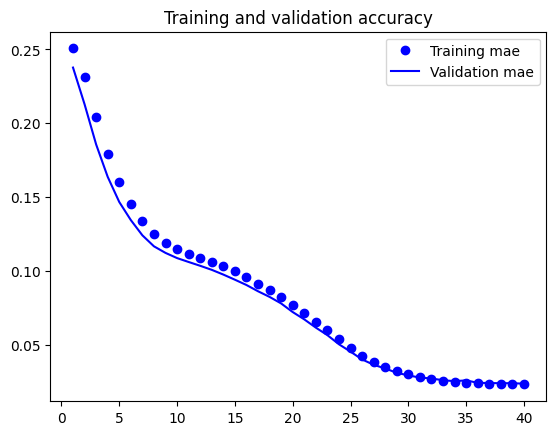

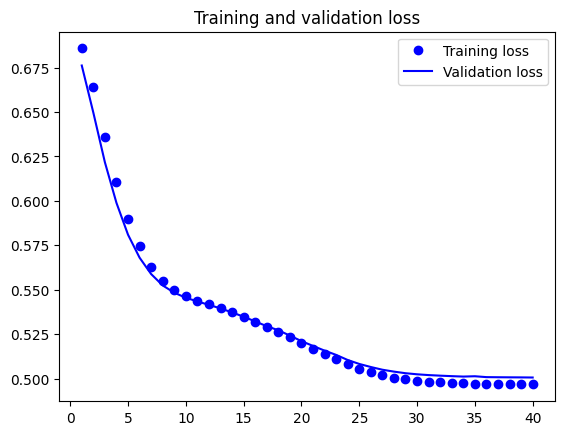

In [270]:
plt.plot(x_epochs, mae, "bo", label="Training mae")
plt.plot(x_epochs, val_mae, "b", label="Validation mae")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(x_epochs, loss, "bo", label="Training loss")
plt.plot(x_epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [271]:
model_best = keras.models.load_model(modelPath + modelName)

eval_loss, eval_mae = model_best.evaluate(data_evaluation, label_evaluation)
eval_mae_perc = eval_mae * (max_digit - 1)

print(f"Evaluation accuracy: {eval_mae:.3f}")
print(f"Evaluation mae denormalized: {eval_mae_perc:.2f}")

16/16 [==============================] - 0s 4ms/step - loss: 0.4979 - mae: 0.0242
Evaluation accuracy: 0.024
Evaluation mae denormalized: 2.39


In [272]:
def denormalize(x):
    x = x * (max_digit - 1)
    return x

def rounding(x):
    x = round(x, 0)
    return x

predictions = model_best.predict(data_evaluation)
targets = label_evaluation

16/16 [==============================] - 0s 7ms/step


In [273]:
# denormalize and round 

predictions_denorm = []
targets_denorm = []
for i in range(len(predictions)):
    temp_pred_denorm_array = []
    temp_targ_denorm_array = []
    for ii in range(array_length):
        temp_pred_denorm_array.append(rounding(denormalize(float(predictions[i][ii]))))
        temp_targ_denorm_array.append(rounding(denormalize(targets[i][ii])))
    predictions_denorm.append(temp_pred_denorm_array)
    targets_denorm.append(temp_targ_denorm_array)

print(len(predictions_denorm), len(targets_denorm))
print(predictions_denorm[:3])
print(targets_denorm[:3])

500 500
[[1.0, 2.0, 3.0, 5.0, 6.0, 7.0, 9.0, 10.0, 12.0, 13.0, 14.0, 16.0, 18.0, 19.0, 21.0, 23.0, 24.0, 26.0, 27.0, 29.0, 31.0, 32.0, 33.0, 35.0, 37.0, 38.0, 40.0, 41.0, 44.0, 45.0, 46.0, 48.0, 49.0, 51.0, 54.0, 54.0, 55.0, 57.0, 59.0, 60.0, 62.0, 63.0, 64.0, 66.0, 69.0, 70.0, 73.0, 73.0, 75.0, 77.0], [1.0, 2.0, 3.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 13.0, 14.0, 15.0, 16.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 25.0, 26.0, 27.0, 28.0, 30.0, 31.0, 32.0, 33.0, 35.0, 36.0, 37.0, 39.0, 40.0, 42.0, 42.0, 44.0, 45.0, 46.0, 47.0, 48.0, 50.0, 51.0, 52.0, 53.0, 55.0, 57.0, 58.0, 60.0, 61.0, 63.0], [1.0, 1.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 5.0, 6.0, 7.0, 7.0, 9.0, 9.0, 9.0, 10.0, 10.0, 10.0, 11.0, 12.0, 12.0, 13.0, 13.0, 14.0, 15.0, 15.0, 16.0, 16.0, 17.0, 17.0, 18.0, 18.0, 19.0, 20.0, 20.0, 20.0, 21.0, 22.0, 22.0, 22.0, 22.0, 23.0, 23.0, 24.0, 24.0, 24.0, 25.0, 25.0, 25.0]]
[[0.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 5.0, 9.0, 10.0, 14.0, 15.0, 17.0, 19.0, 20.0, 23.0, 24.0, 27.0, 28.0,

In [274]:
# plot the prediction and target by merging all the arrays 

index_x = 0
x_merged = []
pred_merged = []
targ_merged = []
for i in range(len(predictions_denorm)):
    for ii in range(array_length):
        index_x += 1
        x_merged.append(index_x)
        pred_merged.append(predictions_denorm[i][ii])
        targ_merged.append(targets_denorm[i][ii])

In [275]:
# calculate error that are elements out of place 

miss = 0
hit = 0
tot = len(pred_merged)
for i in range(len(pred_merged)):
    if (pred_merged[i] == targ_merged[i]):
        hit += 1
    else:
        miss += 1
perc = round(hit * 100 / tot, 1)

print(f"tot: {tot}, hit: {hit}, miss: {miss}, perc hit: {perc}%")

tot: 25000, hit: 3700, miss: 21300, perc hit: 14.8%


In [276]:
# calculate mean absolute error 
# need to calculate the maximum for every array as they are different 

def mean_absolute_error_array(pre_denorm, tar_denorm):
    N = len(pre_denorm)
    errors_array = []
    for i in range(N):
        temp_error = 0
        temp_sum = 0
        n = array_length
        for ii in range(n):
            temp_sum += abs(pre_denorm[i][ii] - tar_denorm[i][ii])
        temp_error = temp_sum / n
        errors_array.append(temp_error)
    return errors_array

def mean_absolute_error(mae_array):
    return np.mean(mae_array)


def mean_absolute_error_perc(mae_array, tar_denorm):
    # calcualte the max value 
    # take the target for the maximum 
    max_val_array = []
    for i in range(len(tar_denorm)):
        max_val_array.append(np.max(tar_denorm[i]))
    
    mae_perc_array = []
    for i in range(len(tar_denorm)):
        mae_perc_array.append(mae_array[i] * 100 / max_val_array[i])
    
    mae_perc = np.mean(mae_perc_array)
    
    return max_val_array, mae_perc_array, mae_perc

mae_array = mean_absolute_error_array(predictions_denorm, targets_denorm)
mae = mean_absolute_error(mae_array)
max_val_array, mae_perc_array, mae_perc = mean_absolute_error_perc(mae_array, targets_denorm)
mae_perc = round(mae_perc, 1)

print(predictions_denorm[:3])
print(targets_denorm[:3])
print(f"mean absolute error of every array: {mae_array[:3]}")
print(f"max value of every array: {max_val_array[:3]}")
print(f"mae perc of every array: {mae_perc_array[:3]}")
print()
print(f"mean absolute error: {mae}")
print(f"mean absolute error perc: {mae_perc}%")

[[1.0, 2.0, 3.0, 5.0, 6.0, 7.0, 9.0, 10.0, 12.0, 13.0, 14.0, 16.0, 18.0, 19.0, 21.0, 23.0, 24.0, 26.0, 27.0, 29.0, 31.0, 32.0, 33.0, 35.0, 37.0, 38.0, 40.0, 41.0, 44.0, 45.0, 46.0, 48.0, 49.0, 51.0, 54.0, 54.0, 55.0, 57.0, 59.0, 60.0, 62.0, 63.0, 64.0, 66.0, 69.0, 70.0, 73.0, 73.0, 75.0, 77.0], [1.0, 2.0, 3.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 13.0, 14.0, 15.0, 16.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 25.0, 26.0, 27.0, 28.0, 30.0, 31.0, 32.0, 33.0, 35.0, 36.0, 37.0, 39.0, 40.0, 42.0, 42.0, 44.0, 45.0, 46.0, 47.0, 48.0, 50.0, 51.0, 52.0, 53.0, 55.0, 57.0, 58.0, 60.0, 61.0, 63.0], [1.0, 1.0, 2.0, 3.0, 3.0, 3.0, 4.0, 4.0, 5.0, 5.0, 6.0, 7.0, 7.0, 9.0, 9.0, 9.0, 10.0, 10.0, 10.0, 11.0, 12.0, 12.0, 13.0, 13.0, 14.0, 15.0, 15.0, 16.0, 16.0, 17.0, 17.0, 18.0, 18.0, 19.0, 20.0, 20.0, 20.0, 21.0, 22.0, 22.0, 22.0, 22.0, 23.0, 23.0, 24.0, 24.0, 24.0, 25.0, 25.0, 25.0]]
[[0.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 5.0, 9.0, 10.0, 14.0, 15.0, 17.0, 19.0, 20.0, 23.0, 24.0, 27.0, 28.0, 29.0, 3

In [277]:
print("array_length: ", array_length)
print(len(pred_merged), len(targ_merged))
print(pred_merged[:(2*array_length)])
print(targ_merged[:(2*array_length)])

array_length:  50
25000 25000
[1.0, 2.0, 3.0, 5.0, 6.0, 7.0, 9.0, 10.0, 12.0, 13.0, 14.0, 16.0, 18.0, 19.0, 21.0, 23.0, 24.0, 26.0, 27.0, 29.0, 31.0, 32.0, 33.0, 35.0, 37.0, 38.0, 40.0, 41.0, 44.0, 45.0, 46.0, 48.0, 49.0, 51.0, 54.0, 54.0, 55.0, 57.0, 59.0, 60.0, 62.0, 63.0, 64.0, 66.0, 69.0, 70.0, 73.0, 73.0, 75.0, 77.0, 1.0, 2.0, 3.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 13.0, 14.0, 15.0, 16.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 25.0, 26.0, 27.0, 28.0, 30.0, 31.0, 32.0, 33.0, 35.0, 36.0, 37.0, 39.0, 40.0, 42.0, 42.0, 44.0, 45.0, 46.0, 47.0, 48.0, 50.0, 51.0, 52.0, 53.0, 55.0, 57.0, 58.0, 60.0, 61.0, 63.0]
[0.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 5.0, 9.0, 10.0, 14.0, 15.0, 17.0, 19.0, 20.0, 23.0, 24.0, 27.0, 28.0, 29.0, 31.0, 33.0, 36.0, 38.0, 38.0, 42.0, 43.0, 44.0, 46.0, 51.0, 53.0, 57.0, 58.0, 59.0, 62.0, 65.0, 66.0, 67.0, 68.0, 68.0, 70.0, 71.0, 73.0, 74.0, 75.0, 81.0, 83.0, 83.0, 1.0, 2.0, 3.0, 5.0, 6.0, 8.0, 8.0, 12.0, 13.0, 13.0, 14.0, 16.0, 17.0, 20.0, 22.0, 23.0, 24.0,

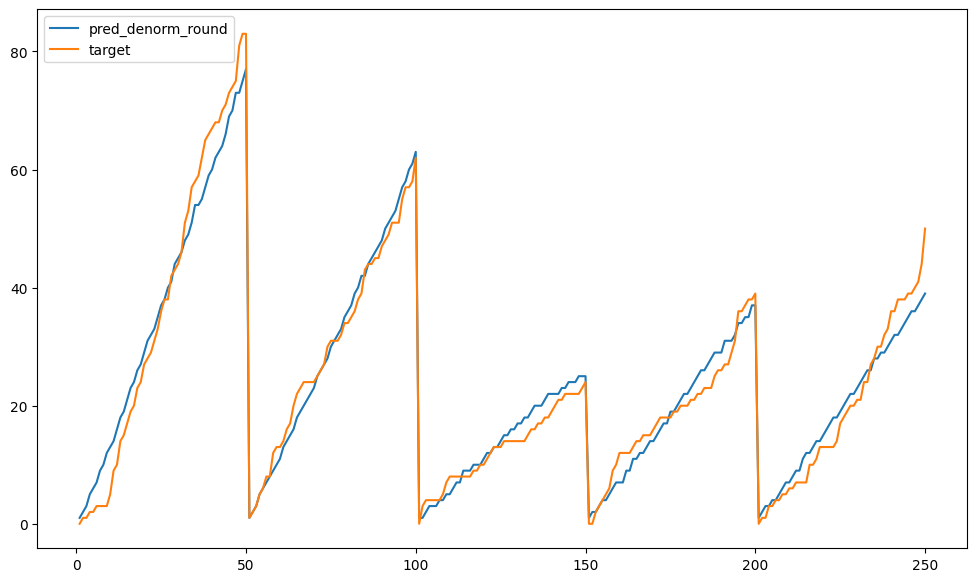

In [278]:
plot_length = array_length * 5

plt.figure(figsize=(12, 7))
plt.plot(x_merged[:plot_length], pred_merged[:plot_length], label="pred_denorm_round")
plt.plot(x_merged[:plot_length], targ_merged[:plot_length], label="target")
plt.legend(loc="upper left")
plt.show()